In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

Using Theano backend.


In [2]:
subjects=pd.read_csv("subjects.csv")

In [3]:
subjects=subjects[subjects['Label (0 for the null class)']!=0]

In [4]:
#subjects.drop(columns=['Unnamed: 0', 'index'],inplace=True)
subjects.reset_index(inplace=True)

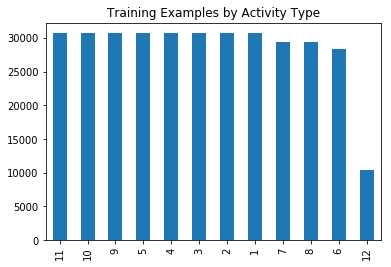

In [5]:
subjects['Label (0 for the null class)'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')
plt.show()

In [6]:
subjects.drop(columns=['level_0','index'],inplace=True)


In [7]:
subjects.reset_index(inplace=True)

In [8]:
subjects.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
subjects.head()

,index,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),...,acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class)
0,0,1,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,...,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
1,1,1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,...,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363,1
2,2,1,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,...,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
3,3,1,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,...,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198,1
4,4,1,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,...,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017,1


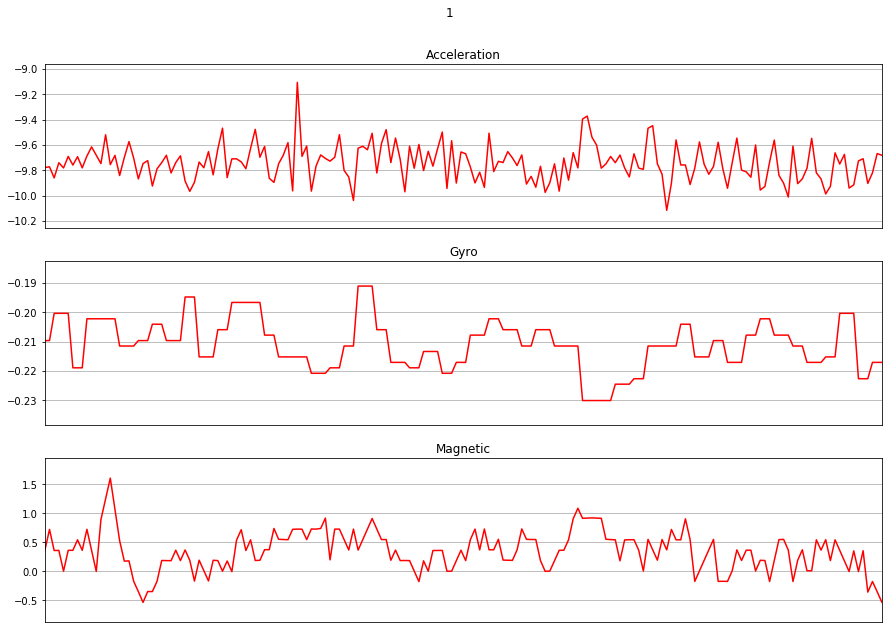

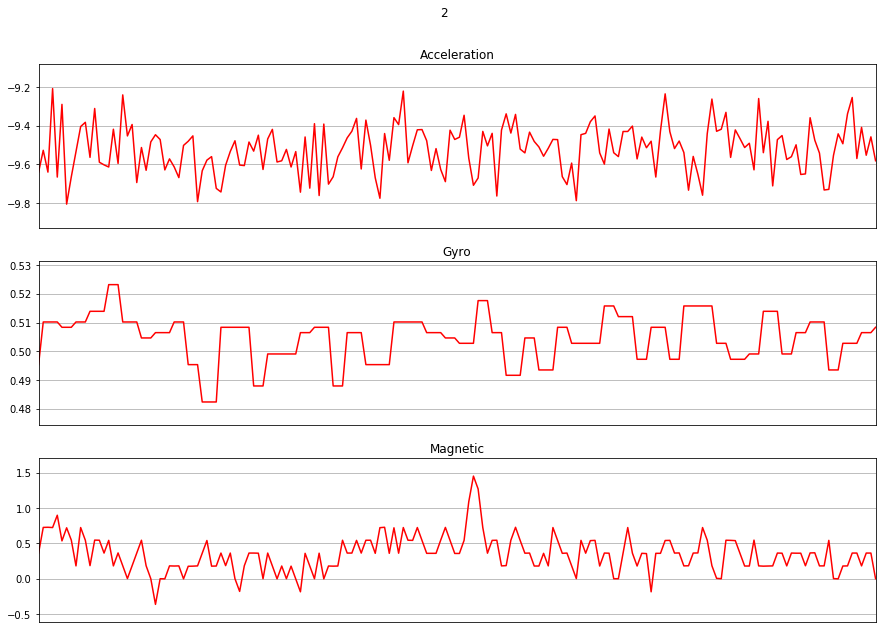

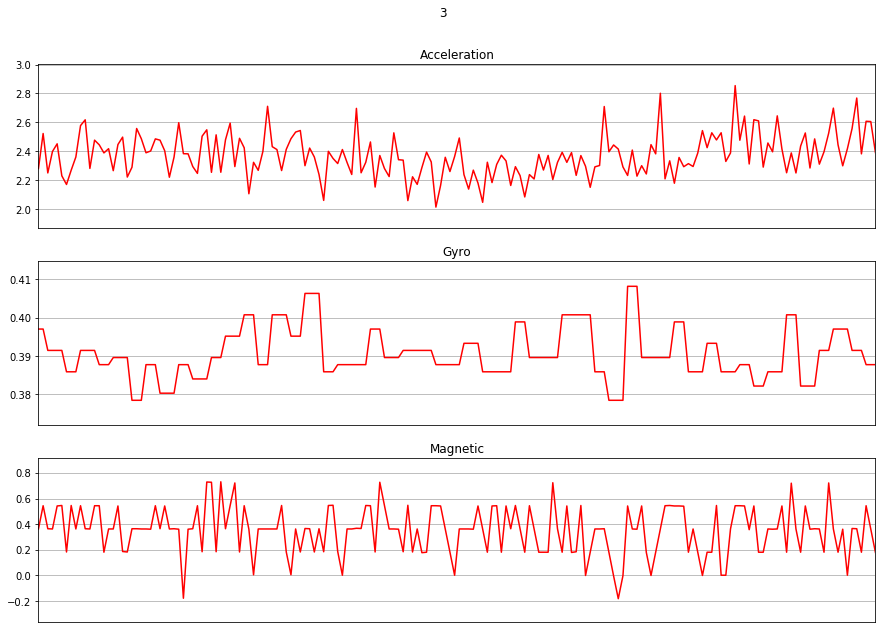

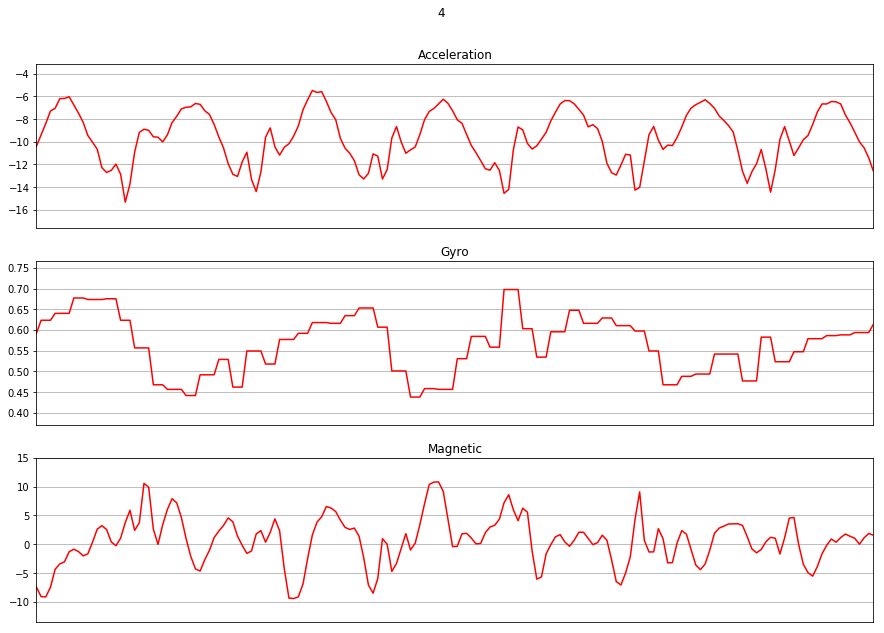

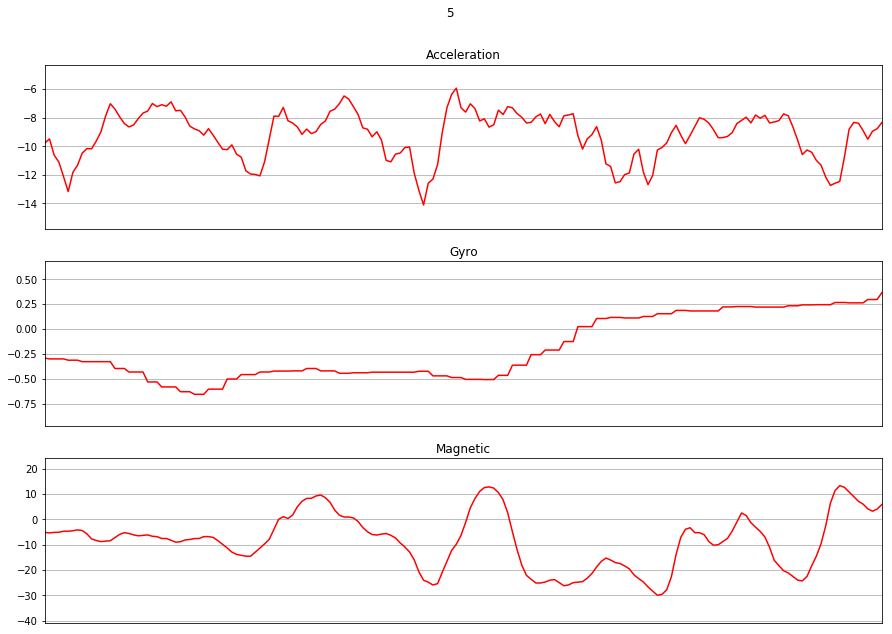

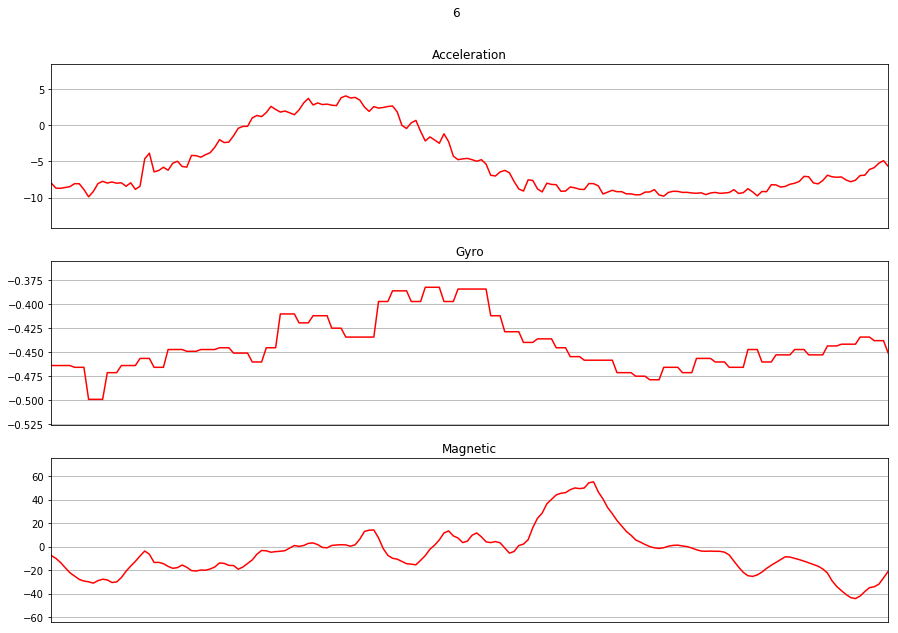

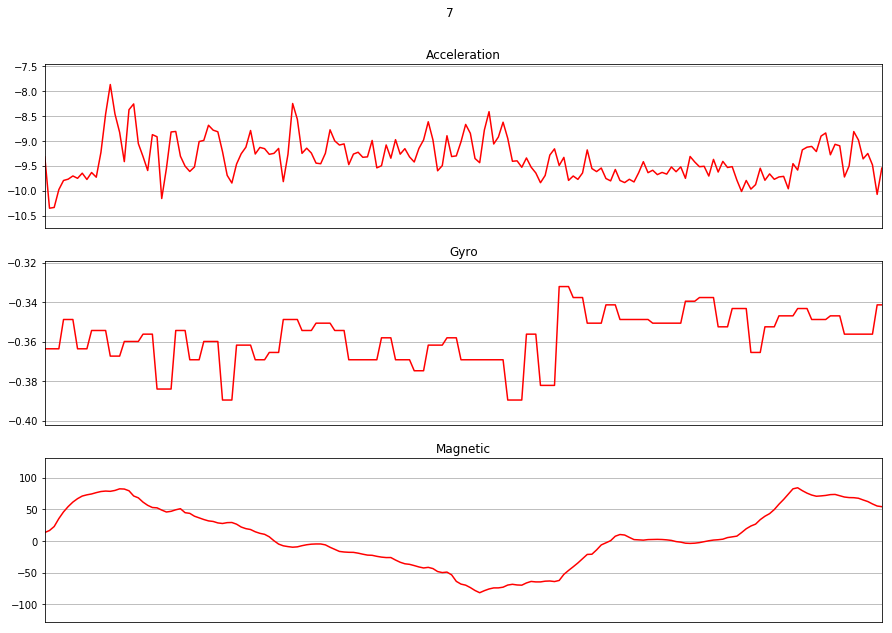

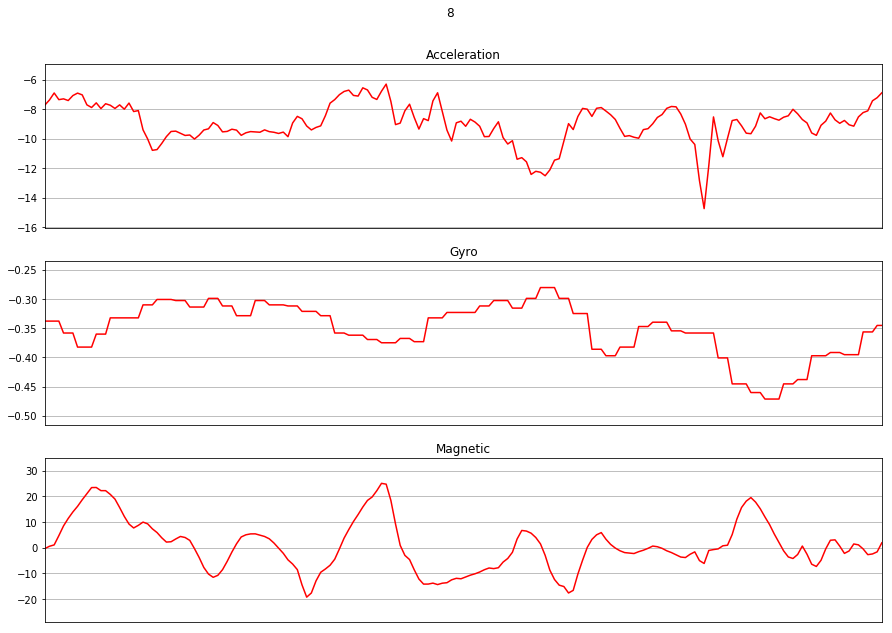

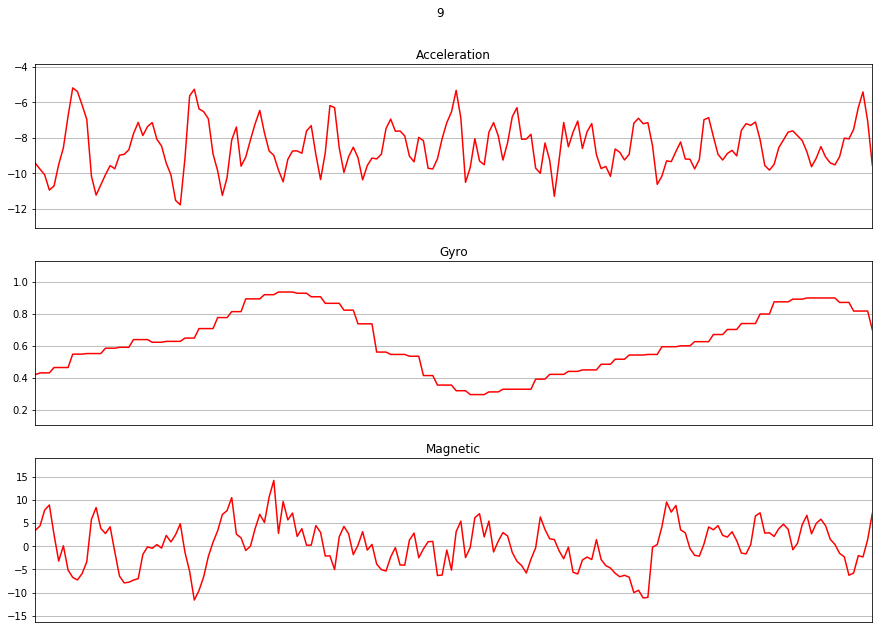

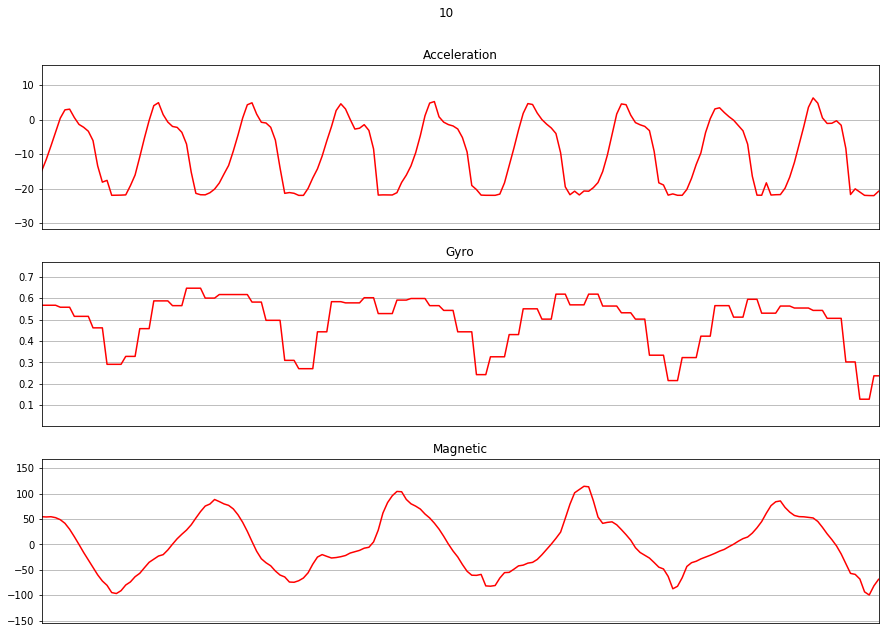

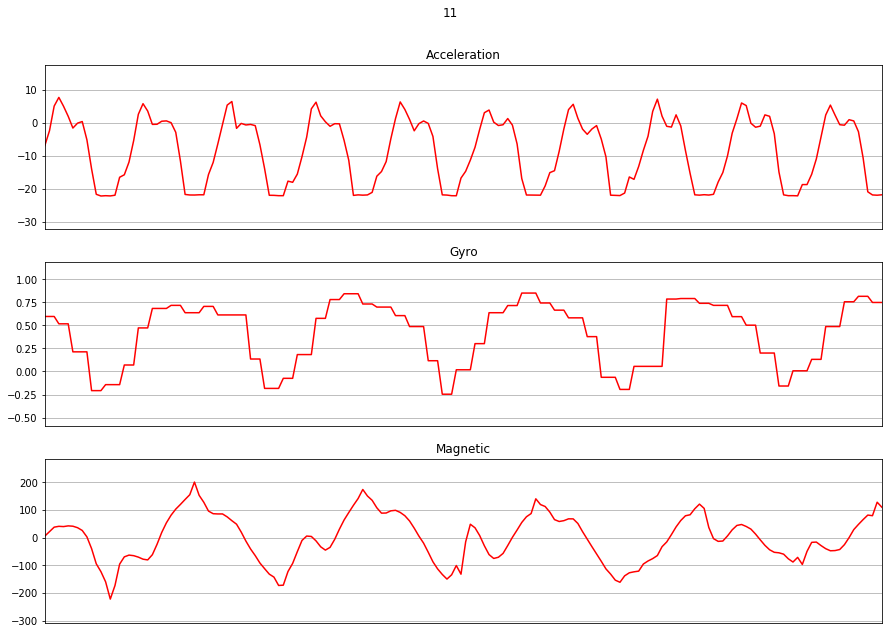

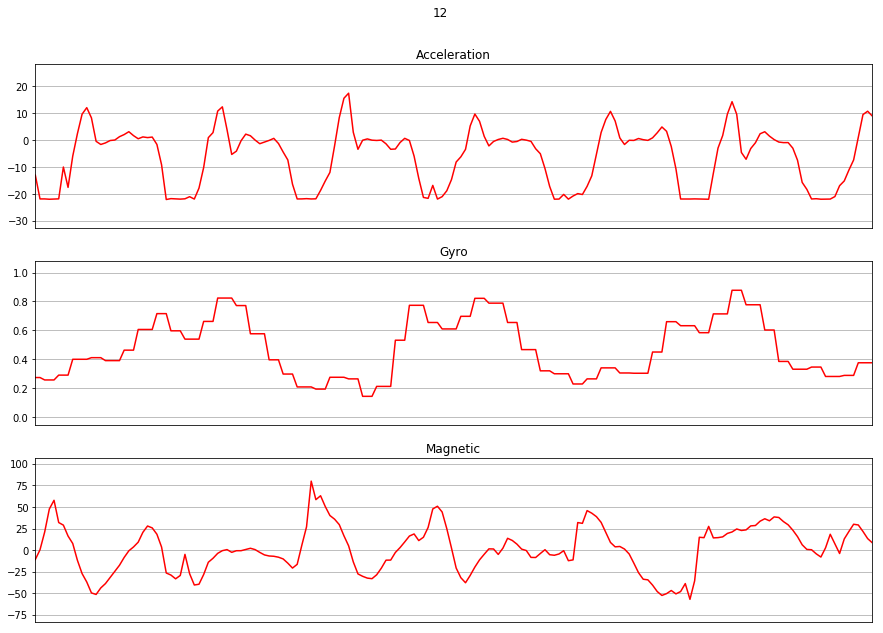

In [10]:
def plot_activity(activity, data):

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=False)
    plot_axis(ax0, data['index'], data['acceleration from the chest sensor (X axis)'], 'Acceleration')
    plot_axis(ax1, data['index'], data['gyro from the left-ankle sensor (X axis)'], 'Gyro')
    plot_axis(ax2, data['index'], data['magnetometer from the right-lower-arm sensor (X axis)'], 'Magnetic')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for label in np.unique(subjects['Label (0 for the null class)']):
    subset = subjects[subjects['Label (0 for the null class)'] == label][:180]
    plot_activity(label, subset)

In [31]:
subjects.head()

,index,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),...,acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class)
0,0,1,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,...,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
1,1,1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,...,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363,1
2,2,1,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,...,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,1
3,3,1,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,...,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198,1
4,4,1,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,...,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017,1


In [10]:
subjects=subjects.sample(frac=0.01,random_state=1)
subjects.shape[0]

34320

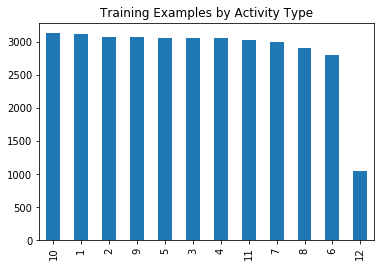

In [12]:
subjects['Label (0 for the null class)'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')
plt.show()

In [14]:
subjects.drop(columns='index',inplace=True)

In [35]:
subjects.head()

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),...,acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis),Label (0 for the null class)
251801,8,-8.9197,-1.99320,2.5259,-0.083726,-0.041863,0.93917,-8.54830,-1.36590,-0.64564,...,-2.5767,-7.27020,-1.01980,0.037255,-0.95072,-0.55603,-8.50410,-6.60780,38.52400,4
321061,10,-2.2194,-6.70660,6.8280,-0.159080,-0.129770,7.57650,0.45671,6.06740,0.53618,...,-10.1220,0.23981,-0.01926,-0.747060,0.44353,0.44828,0.54758,0.89837,-0.35904,3
50696,2,1.8091,0.45313,-11.1800,0.422820,0.071167,-0.56476,-9.88210,-2.07270,-0.58813,...,-5.3836,-9.60680,0.32174,-0.372550,-0.88296,-0.40302,1.36090,10.41200,26.27700,6
241951,8,-9.2295,-1.15190,3.9384,-0.066981,-0.117220,1.65900,-9.63220,0.14957,-0.64564,...,-3.6120,-9.09570,-1.56940,-0.600000,-0.27926,-0.54095,-9.42220,-26.59800,-1.36650,1
13874,1,-8.9433,-0.31075,0.9194,0.527470,-0.117220,-0.18765,-9.84160,0.98521,-0.50835,...,-1.3029,-7.24490,1.51280,-0.535290,-0.58111,0.79741,24.30100,42.28700,-48.31200,6


In [36]:
X_train=subjects[(subjects['subject_number']!=10)].drop(columns=['subject_number','Label (0 for the null class)','electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'])

X_test=subjects[(subjects['subject_number']==10)].drop(columns=['subject_number','Label (0 for the null class)','electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'])


y_train=subjects[(subjects['subject_number']!=10)]['Label (0 for the null class)']
y_test=subjects[(subjects['subject_number']==10)]['Label (0 for the null class)']

In [37]:
X_train

,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),...,magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis)
251801,-8.91970,-1.99320,2.52590,0.93917,-8.5483,-1.36590,-0.64564,-0.30582,-0.842830,161.12000,...,-9.65470,-2.57670,-7.2702,-1.01980,0.037255,-0.95072,-0.55603,-8.50410,-6.607800,38.52400
50696,1.80910,0.45313,-11.18000,-0.56476,-9.8821,-2.07270,-0.58813,-0.72608,-0.620830,-1.82640,...,0.71197,-5.38360,-9.6068,0.32174,-0.372550,-0.88296,-0.40302,1.36090,10.412000,26.27700
241951,-9.22950,-1.15190,3.93840,1.65900,-9.6322,0.14957,-0.64564,-0.26642,0.656190,1.08810,...,-0.16779,-3.61200,-9.0957,-1.56940,-0.600000,-0.27926,-0.54095,-9.42220,-26.598000,-1.36650
13874,-8.94330,-0.31075,0.91940,-0.18765,-9.8416,0.98521,-0.50835,-0.65854,0.469550,-10.12700,...,0.61057,-1.30290,-7.2449,1.51280,-0.535290,-0.58111,0.79741,24.30100,42.287000,-48.31200
134937,-18.79900,-0.45125,-3.97750,3.59860,-2.5338,-2.88240,-0.51948,0.16886,-1.007900,107.23000,...,17.80100,-20.98200,-11.6370,-7.71730,-0.731370,-0.55236,-0.50862,-107.12000,-48.098000,37.68900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258385,-0.65926,8.21560,-9.09220,1.37470,-9.3705,1.56610,0.73284,-0.59662,0.176820,20.63400,...,-1.88110,-0.14973,-13.6650,-1.45410,0.462750,-0.95072,0.55172,-16.30400,21.339000,-24.00500
19617,-9.53080,-0.22851,-2.84160,1.11570,-8.2864,-4.88230,-0.44712,-0.95122,-0.009823,12.30100,...,-6.91440,-3.15830,-9.1700,0.99983,-0.868630,-0.51540,0.37716,-5.87470,22.946000,-34.28200
18084,-9.45920,0.73607,1.78200,2.38810,-9.4776,0.75834,-0.34508,-0.81801,0.457760,-2.29870,...,-1.59660,-8.49700,-12.4330,3.71170,-0.978430,-0.36756,0.32759,-63.17300,20.193000,-149.12000
144057,-9.72140,-0.79925,-0.50351,1.93650,-9.4602,0.51511,0.76252,-0.63602,-0.123770,0.37866,...,-0.58841,-2.11830,-9.5753,0.46915,0.431370,-1.00410,0.41595,0.35896,-0.010737,-0.71474


In [38]:
# Normalize features for training data set (values between 0 and 1)
# Surpress warning for next 3 operation
pd.options.mode.chained_assignment = None  # default='warn'

for i in range(0,21):
    X_train[X_train.columns[i]] = X_train[X_train.columns[i]] / X_train[X_train.columns[i]].max()

# Round numbers
#X_train = df_train.round({'x-axis': 4, 'y-axis': 4, 'z-axis': 4})

In [39]:
X_train

,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),...,magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis)
251801,-0.469433,-0.095291,0.129726,0.046928,-0.406888,-0.055309,-0.407962,-0.181313,-0.635570,0.475378,...,-0.035997,-0.131096,-0.331806,-0.039850,0.028232,-0.871980,-0.363894,-0.040436,-0.020114,0.067903
50696,0.095211,0.021663,-0.574187,-0.028220,-0.470375,-0.083929,-0.371623,-0.430474,-0.468162,-0.005389,...,0.002655,-0.273905,-0.438446,0.012572,-0.282320,-0.809832,-0.263757,0.006471,0.031694,0.046316
241951,-0.485738,-0.055070,0.202270,0.082896,-0.458480,0.006056,-0.407962,-0.157953,0.494827,0.003210,...,-0.000626,-0.183770,-0.415120,-0.061326,-0.454683,-0.256131,-0.354025,-0.044801,-0.080963,-0.002409
13874,-0.470675,-0.014856,0.047219,-0.009376,-0.468447,0.039894,-0.321212,-0.390431,0.354083,-0.029879,...,0.002276,-0.066288,-0.330651,0.059115,-0.405646,-0.532982,0.521865,0.115548,0.128720,-0.085155
134937,-0.989369,-0.021573,-0.204278,0.179813,-0.120605,-0.116715,-0.328245,0.100113,-0.760048,0.316378,...,0.066370,-1.067515,-0.531103,-0.301563,-0.554236,-0.506613,-0.332866,-0.509343,-0.146408,0.066431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258385,-0.034696,0.392771,-0.466961,0.068690,-0.446023,0.063415,0.463061,-0.353720,0.133338,0.060880,...,-0.007014,-0.007618,-0.623659,-0.056821,0.350674,-0.871980,0.361073,-0.077524,0.064955,-0.042311
19617,-0.501595,-0.010925,-0.145940,0.055749,-0.394421,-0.197696,-0.282522,-0.563953,-0.007408,0.036294,...,-0.025780,-0.160687,-0.418511,0.039070,-0.658253,-0.472714,0.246832,-0.027934,0.069847,-0.060426
18084,-0.497826,0.035190,0.091521,0.119327,-0.451121,0.030707,-0.218046,-0.484977,0.345193,-0.006782,...,-0.005953,-0.432307,-0.567432,0.145039,-0.741460,-0.337118,0.214391,-0.300380,0.061467,-0.262841
144057,-0.511626,-0.038211,-0.025859,0.096762,-0.450293,0.020858,0.481815,-0.377080,-0.093334,0.001117,...,-0.002194,-0.107774,-0.437009,0.018333,0.326895,-0.920939,0.272219,0.001707,-0.000033,-0.001260


In [40]:
X_train.columns

Index(['acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'gyro from the right

In [41]:
TIME_PERIODS = 100
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 2
def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleration as features
    N_FEATURES = 21
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
    segments = []
    labels = []
    for i in range(0, len(subjects) - time_steps, step):
        xs1 = df['acceleration from the chest sensor (X axis)'].values[i: i + time_steps]
        ys1 = df['acceleration from the chest sensor (Y axis)'].values[i: i + time_steps]
        zs1 = df['acceleration from the chest sensor (Z axis)'].values[i: i + time_steps]
        xs2 = df['acceleration from the left-ankle sensor (X axis)'].values[i: i + time_steps]
        ys2 = df['acceleration from the left-ankle sensor (Y axis)'].values[i: i + time_steps]
        zs2 = df['acceleration from the left-ankle sensor (Z axis)'].values[i: i + time_steps]
        xs3 = df['gyro from the left-ankle sensor (X axis)'].values[i: i + time_steps]
        ys3 = df['gyro from the left-ankle sensor (Y axis)'].values[i: i + time_steps]
        zs3 = df['gyro from the left-ankle sensor (Z axis)'].values[i: i + time_steps]
        xs4 = df['magnetometer from the left-ankle sensor (X axis)'].values[i: i + time_steps]
        ys4 = df['magnetometer from the left-ankle sensor (Y axis)'].values[i: i + time_steps]
        zs4 = df['magnetometer from the left-ankle sensor (Z axis)'].values[i: i + time_steps]
        xs5 = df['acceleration from the right-lower-arm sensor (X axis)'].values[i: i + time_steps]
        ys5 = df['acceleration from the right-lower-arm sensor (Y axis)'].values[i: i + time_steps]
        zs5 = df['acceleration from the right-lower-arm sensor (Z axis)'].values[i: i + time_steps]        
        xs6 = df['gyro from the right-lower-arm sensor (X axis)'].values[i: i + time_steps]
        ys6 = df['gyro from the right-lower-arm sensor (Y axis)'].values[i: i + time_steps]
        zs6 = df['gyro from the right-lower-arm sensor (Z axis)'].values[i: i + time_steps]        
        xs7 = df['magnetometer from the right-lower-arm sensor (X axis)'].values[i: i + time_steps]
        ys7 = df['magnetometer from the right-lower-arm sensor (Y axis)'].values[i: i + time_steps]
        zs7 = df['magnetometer from the right-lower-arm sensor (Z axis)'].values[i: i + time_steps]            
        
        # Retrieve the most often used label in this segment
        label = stats.mode(subjects[label_name][i: i + time_steps])[0][0]
        segments.append([xs1, ys1, zs1, xs2, ys2, zs2, xs3, ys3, zs3, xs4, ys4, zs4, xs5, ys5, zs5, xs6, ys6, zs6, xs7, ys7, zs7])
        labels.append(label)

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

X_train, y_train = create_segments_and_labels(X_train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              "Label (0 for the null class)")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-203f01647714>", line 51, in <module>
    "Label (0 for the null class)")
  File "<ipython-input-41-203f01647714>", line 43, in create_segments_and_labels
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
  File "/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py", line 85, in asarray
    return array(a, dtype, copy=False, order=order)
ValueError: setting an array element with a sequence.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeErro

ValueError: setting an array element with a sequence.

In [33]:
print('x_train shape: ', X_train.shape)
print(X_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)

x_train shape:  (30920, 21)
30920 training samples
y_train shape:  (30920,)


In [34]:
display(X_train)

,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),magnetometer from the left-ankle sensor (X axis),...,magnetometer from the left-ankle sensor (Z axis),acceleration from the right-lower-arm sensor (X axis),acceleration from the right-lower-arm sensor (Y axis),acceleration from the right-lower-arm sensor (Z axis),gyro from the right-lower-arm sensor (X axis),gyro from the right-lower-arm sensor (Y axis),gyro from the right-lower-arm sensor (Z axis),magnetometer from the right-lower-arm sensor (X axis),magnetometer from the right-lower-arm sensor (Y axis),magnetometer from the right-lower-arm sensor (Z axis)
251801,-0.469433,-0.095291,0.129726,0.046928,-0.406888,-0.055309,-0.407962,-0.181313,-0.635570,0.475378,...,-0.035997,-0.131096,-0.331806,-0.039850,0.028232,-0.871980,-0.363894,-0.040436,-0.020114,0.067903
50696,0.095211,0.021663,-0.574187,-0.028220,-0.470375,-0.083929,-0.371623,-0.430474,-0.468162,-0.005389,...,0.002655,-0.273905,-0.438446,0.012572,-0.282320,-0.809832,-0.263757,0.006471,0.031694,0.046316
241951,-0.485738,-0.055070,0.202270,0.082896,-0.458480,0.006056,-0.407962,-0.157953,0.494827,0.003210,...,-0.000626,-0.183770,-0.415120,-0.061326,-0.454683,-0.256131,-0.354025,-0.044801,-0.080963,-0.002409
13874,-0.470675,-0.014856,0.047219,-0.009376,-0.468447,0.039894,-0.321212,-0.390431,0.354083,-0.029879,...,0.002276,-0.066288,-0.330651,0.059115,-0.405646,-0.532982,0.521865,0.115548,0.128720,-0.085155
134937,-0.989369,-0.021573,-0.204278,0.179813,-0.120605,-0.116715,-0.328245,0.100113,-0.760048,0.316378,...,0.066370,-1.067515,-0.531103,-0.301563,-0.554236,-0.506613,-0.332866,-0.509343,-0.146408,0.066431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258385,-0.034696,0.392771,-0.466961,0.068690,-0.446023,0.063415,0.463061,-0.353720,0.133338,0.060880,...,-0.007014,-0.007618,-0.623659,-0.056821,0.350674,-0.871980,0.361073,-0.077524,0.064955,-0.042311
19617,-0.501595,-0.010925,-0.145940,0.055749,-0.394421,-0.197696,-0.282522,-0.563953,-0.007408,0.036294,...,-0.025780,-0.160687,-0.418511,0.039070,-0.658253,-0.472714,0.246832,-0.027934,0.069847,-0.060426
18084,-0.497826,0.035190,0.091521,0.119327,-0.451121,0.030707,-0.218046,-0.484977,0.345193,-0.006782,...,-0.005953,-0.432307,-0.567432,0.145039,-0.741460,-0.337118,0.214391,-0.300380,0.061467,-0.262841
144057,-0.511626,-0.038211,-0.025859,0.096762,-0.450293,0.020858,0.481815,-0.377080,-0.093334,0.001117,...,-0.002194,-0.107774,-0.437009,0.018333,0.326895,-0.920939,0.272219,0.001707,-0.000033,-0.001260


In [23]:
num_time_periods, num_sensors = X_train.shape[1], X_train.shape[2]
# num_classes = subjects.classes_.size
# print(list(subjects.classes_))